# Assignment 2

_Bernardo Carvalho_

In this assignment, we will explore the dataset Tahoe's healthcare case. The case is about the costs incurred by hospital on the readmission of patients, imposed by the Obama care act. Ever since this program started, hospitals started being penalized in their costs refunding by the goverment on the readmission of patients. Motivated by that, Tahoe launched a program to try to reduce the number of readmited patients. However, this program has a cost of implementation. In this assignment, we will investigate if the use of a machine learning model can reduce target the patients with the highest likelihood of readmission for the application of the program.  

We start by importing the necessary packages and datasets:

In [1]:
# Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the full dataset
data = pd.read_csv("Tahoe_Healthcare_Data.csv")

## (i) Estimating loss in reimbursement

The reasearch estimates the loss per readmited patient as being USD 8000. Therefore, to get to the total estimated loss we multiply the number of readmited patients by that value. We can identify the readmited patients by column "readmit30" of the dataset. Hence:

In [4]:
readmit_patients = data['readmit30'].sum()
loss_per_readmit = 8000

print("The total loss due to readmission is: USD {}".format(readmit_patients*loss_per_readmit))

The total loss due to readmission is: USD 7984000


## (ii) Estimating the net change in cost if Caretracker is applied to all patients

If we apply CareTracker to all patients, we would incur the cost of the program to all patients, and only reduce the readmission of 40%, according to the estimation of the article. Therefore:

In [6]:
total_patients = len(data)
readmit_patients = data['readmit30'].sum()
cost_program = 1200
benefit_program = 8000

net_benefit = readmit_patients*.4*benefit_program - total_patients*cost_program

print("The net benefit is USD {}".format(round(net_benefit,2)))

The net benefit is USD -2064800.0


This means, even though the reduction on the readmission rate looks promissing, if we don't target its application the program becomes loss making

## (iii) Estimating upper bound for cost savings

Assuming 100% accuracy in the predictions, that is, if we could perfectly predict who would be readmited, we would only need to apply the program to those patients, and therefore only incur the costs there.

In [8]:
# Calculating upper bound

upper_bound = readmit_patients*.4*benefit_program - readmit_patients*cost_program
print("The upper bound is USD {}".format(round(upper_bound,2)))

The upper bound is USD 1996000.0


## (iv) Algorithm based only  on the severity score



In [72]:
# Importing sklearn's accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = []
cost_savings = []

for s in range(25,101):
    n_patients_thresh = sum(data['severity score'] > s)
    n_patients_readmitted = sum((data['readmit30'] == 1) & (data['severity score'] > s))
    cost_savings.append(n_patients_readmitted*8000*.4 - n_patients_thresh*1200)
    prediction = [1 if x > s else 0 for x in data['severity score'].values]
    accuracy.append(accuracy_score(prediction, data['readmit30']))


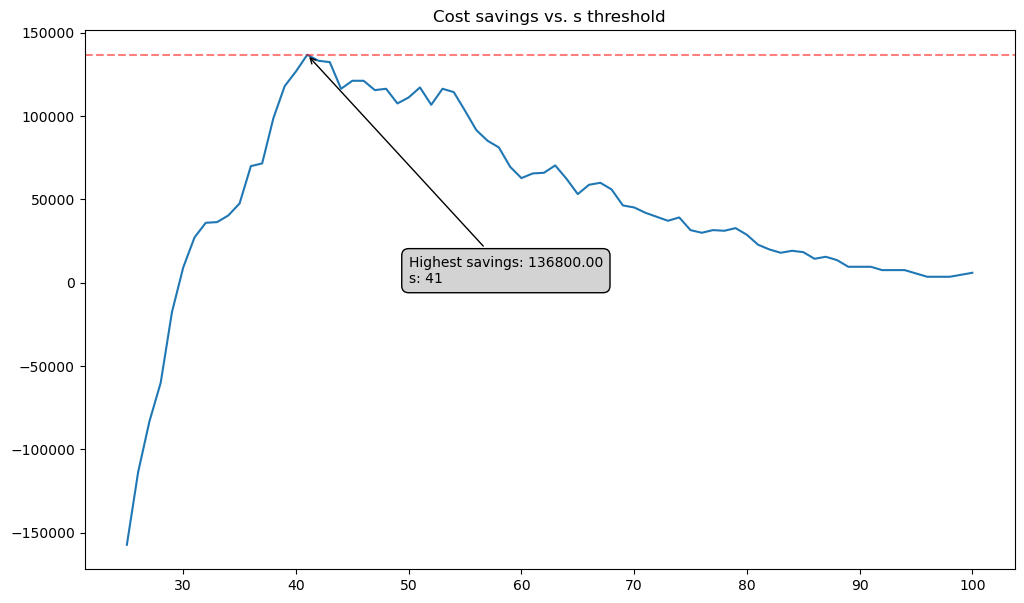

In [61]:
fig = plt.figure(figsize=(12,7))

best_s = cost_savings.index(max(cost_savings))+25
max_savings = cost_savings[cost_savings.index(max(cost_savings))]

plt.plot(range(25,101), cost_savings)
plt.title("Cost savings vs. s threshold")

plt.axhline(y=max_savings, color='r', alpha =0.5, linestyle='--', label='Highest Accuracy Score')

# Annotate the point with an arrow and a text box
plt.annotate(f'Highest savings: {max_savings:.2f}\ns: {best_s}',
             xy=(best_s, max_savings),
             xytext=(50, 0),  # Adjust the position of the text box
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgrey', edgecolor='black'))


plt.show()

### (v)


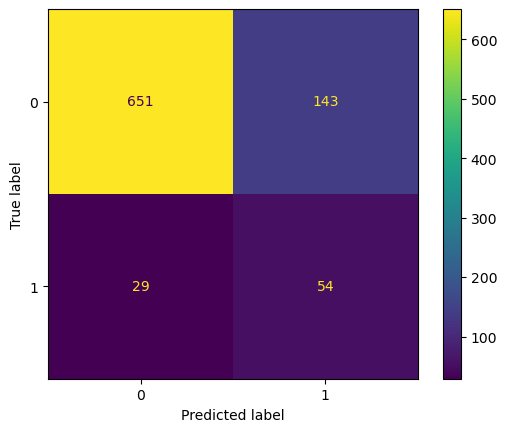

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preparing training data
X_train = np.array(train_data)[:,:-1]
y_train = np.array(train_data)[:,-1]

# Preparing testing data
X_test = np.array(test_data)[:,:-1]
y_test = np.array(test_data)[:,-1]

clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
c_matrix = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()

In [76]:
precision

0.27411167512690354